In [9]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
import numpy as np
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# load data
data = pd.read_csv("LeagueofLegends.csv")

# preprocess and extract features 
# gold difference 
def process_gold_diff(gold_diff_str):
    gold_diff = ast.literal_eval(gold_diff_str)
    final_gold_diff = gold_diff[-1]
    avg_gold_diff = np.mean(gold_diff)
    std_dev_gold_diff = np.std(gold_diff)
    return final_gold_diff, avg_gold_diff, std_dev_gold_diff

# apply function above related to gold difference from the 'golddiff' column
data['final_gold_diff'], data['avg_gold_diff'], data['std_dev_gold_diff'] = zip(*data['golddiff'].map(process_gold_diff))


In [3]:
# preprocess and extract features
# kda ratio
def process_kda(row):
    kda = ast.literal_eval(row)
    kill_count = len(kda)
    return kill_count

def process_kda_diff(b_kda, r_kda):
    bk = b_kda.apply(process_kda)
    rk = r_kda.apply(process_kda)
    kda_diff = bk / rk
    return kda_diff

# apply function above related to kda ratio from the 'bKills' and 'rKills' column
data['kda_ratio'] = process_kda_diff(data['bKills'], data['rKills'])

Accuracy: 0.9678477690288714


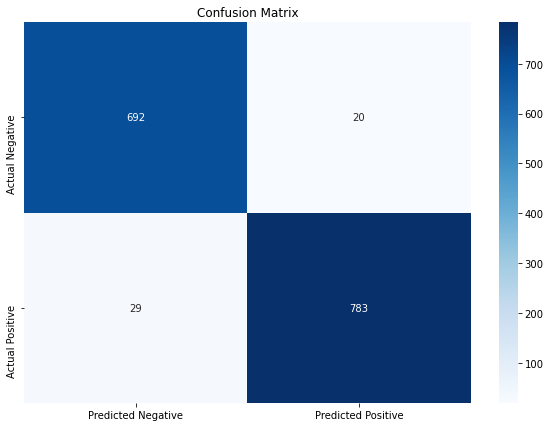

In [4]:
# features and target
X = data[['final_gold_diff', 'avg_gold_diff', 'std_dev_gold_diff']]
y = data['bResult']

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Visualize the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [15]:
print('Correlation: ' + str(data['bResult'].corr(data['avg_gold_diff'])))
print(classification_report(y_test, y_pred))

Correlation: 0.7614916860111413
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       712
           1       0.98      0.96      0.97       812

    accuracy                           0.97      1524
   macro avg       0.97      0.97      0.97      1524
weighted avg       0.97      0.97      0.97      1524

